Find or create a dataset
we use the MNSIT : Consets of 145,600 images

In [1]:
# STEP 1.1
# !git clone https:/github.com/sorki/python-mnist
# !./python-mnist/get_data.sh
# !pip install emnsit

from emnist import extract_training_samples

print("Imported the EMNSIT livraries we need!")

Imported the EMNSIT livraries we need!


In [2]:
# STEP 1.2

# Grab the data from the OpenML website
# X will be our images and y will be the labels
x, y = extract_training_samples('digits')


# Make sure the every pixel in all of the images is a value between 0 and 1
# This images are 28x28 pixels, each pixel is a grayscale value between 0 255
# we devide each value by 255 to simplify the calcul exmpl : 133/255 -> 0.52
# This a machine learning method called preprocessing to simplify the calcul for machine learning
x = x / 255.

# Use the first 60000 as training and the next 10000 as testing
x_train, x_testing = x[:60000], x[60000:70000]
y_train, y_testing = y[:60000], y[60000:70000]

# There is one other we need to do, we need to 
# record the number of samples in each dataset and the number of pixels in each image
x_train = x_train.reshape(60000, 784)
x_testing = x_testing.reshape(10000, 784)


print("Extracted our samples and divided our training and testing data sets")

Extracted our samples and divided our training and testing data sets


Create The neural network with 5 hidden layers with 100 neurons and sets it to run through the data 50 times

In [3]:
# STEP 2.1

# These two lines import the ML libraries we need
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier 

# This create our first MLP with 5 hidden layers with 100 neurons and sets it to run through the data 50 times
mlpl = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100,), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-11, random_state=1,
                    learning_rate_init=.1)

print("Created our first MLP network")

Created our first MLP network


In [4]:
# STEP 3.1

mlpl.fit(x_train, y_train)
print("Training set score: %f" % mlpl.score(x_train, y_train))
print("Test set score: %f" % mlpl.score(x_testing, y_testing))

Iteration 1, loss = 0.92793562
Iteration 2, loss = 0.18657629
Iteration 3, loss = 0.13875285
Iteration 4, loss = 0.11541691
Iteration 5, loss = 0.10000822
Iteration 6, loss = 0.09152413
Iteration 7, loss = 0.08067906
Iteration 8, loss = 0.07453679
Iteration 9, loss = 0.07062741
Iteration 10, loss = 0.06376791
Iteration 11, loss = 0.06066176
Iteration 12, loss = 0.05785420
Iteration 13, loss = 0.05428901
Iteration 14, loss = 0.05011707
Iteration 15, loss = 0.04883102
Iteration 16, loss = 0.04638029
Iteration 17, loss = 0.04458219
Iteration 18, loss = 0.04281804
Iteration 19, loss = 0.03954369
Iteration 20, loss = 0.03902691
Iteration 21, loss = 0.03641658
Iteration 22, loss = 0.03841213
Iteration 23, loss = 0.03569090
Iteration 24, loss = 0.03529964
Iteration 25, loss = 0.03248358
Iteration 26, loss = 0.03214002
Iteration 27, loss = 0.03663895
Iteration 28, loss = 0.02997833
Iteration 29, loss = 0.02623665
Iteration 30, loss = 0.02925250
Iteration 31, loss = 0.02946155
Iteration 32, los

C:\Users\IL-HH\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.992533
Test set score: 0.973400


Save our model after training

In [5]:
import joblib

filename = "Completed_model.joblib"
joblib.dump(mlpl, filename)

['Completed_model.joblib']

Import the model and test it

In [6]:
model = joblib.load("Completed_model.joblib")
model.score(x_testing, y_testing)

0.9734

Import image to be predect

Imported the scanned image.


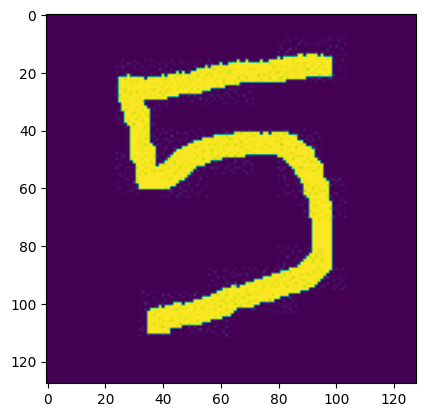

In [7]:
# STEP 4.2

# These libraries let us import the letters, resize them, and print them out
import cv2
import matplotlib.pyplot as plt


img = cv2.imread("./my_drawing.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.bitwise_not(img)

print("Imported the scanned image.")

plt.imshow(img)  # Change this index to see diffrent letters

Preprocess the image to be like the trainned images of EMNSIT Dataset

Processed the scanned images.


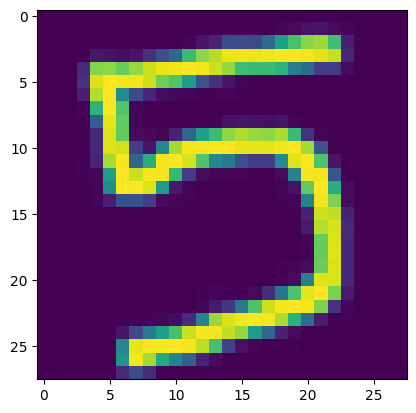

In [8]:
# STEP 4.5

import cv2

# These steps process the scanned images to be in the same format and have the same properties as the EMNIST images
# They are described by the EMNIST authors in detail here : 

# step 1: Apply Gaussian blur filter
img = cv2.GaussianBlur(img, (7, 7), 0)

# step 2 and 3: Extract the Region of interest in the image and center in square
points = cv2.findNonZero(img)
x, y, w, h = cv2.boundingRect(points)
if( w > 0 and h > 0):
    if w > h:
        y = y - (w-h)//2
        img = img[y:y+w, x:x+w]
    else:
        x = x - ( h - w ) // 2
        img = img[y:y+h, x:x+h]

# step 3: Resize and resample to be 28 x 28 pixels
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_CUBIC)

# step 5: Normalize pixelsand reshape before adding to the new story array
img = img/255
img = img.reshape((28, 28))

    
print("Processed the scanned images.")

import matplotlib.pyplot as plt
plt.imshow(img)

In [10]:
import numpy

img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_CUBIC)
img = ((numpy.array(img)).reshape(1, 784))
prediction = model.predict(img)

print(prediction)

[5]
